# Assignment 1. Data Manipulation and Visualization  

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

*For your questions refer to asoleix@gmail.com or @amirsoleix on Telegram*

### Description
In this homework you are supposed to get comfortable (or make sure that you are!) with the basic Python tools frequently used in data science.  

### Information  
Complete the information box below.

In [306]:
full_name = 'Hadi Hadavi'
student_id = '99100263'

In [307]:
# Import all your libraries here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os.path
import zipfile
import math

## 1. Another LEGO brick in the wall
LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following diagram.

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
* Load your data into `Pandas`  

* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### 1.1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

In [308]:
#Loading datasets

#File names
colors_filename = "./data/lego/colors.csv.zip"
inventories_filename = "./data/lego/inventories.csv.zip"
inventory_parts_filename = "./data/lego/inventory_parts.csv.zip"
inventory_sets_filename = "./data/lego/inventory_sets.csv.zip"
part_categories_filename = "./data/lego/part_categories.csv.zip"
parts_filename = "./data/lego/parts.csv.zip"
sets_filename = "./data/lego/sets.csv.zip"
themes_filename = "./data/lego/themes.csv.zip"

#Loading zipfiles and making DataFrames
zf = zipfile.ZipFile(colors_filename, 'r')
with zf.open('colors.csv') as fh:
    colors = pd.read_csv(fh)

zf = zipfile.ZipFile(inventories_filename, 'r')
with zf.open('inventories.csv') as fh:
    inventories = pd.read_csv(fh)

zf = zipfile.ZipFile(inventory_parts_filename, 'r')
with zf.open('inventory_parts.csv') as fh:
    inventory_parts = pd.read_csv(fh)

zf = zipfile.ZipFile(inventory_sets_filename, 'r')
with zf.open('inventory_sets.csv') as fh:
    inventory_sets = pd.read_csv(fh)

zf = zipfile.ZipFile(part_categories_filename, 'r')
with zf.open('part_categories.csv') as fh:
    part_categories = pd.read_csv(fh)

zf = zipfile.ZipFile(parts_filename, 'r')
with zf.open('parts.csv') as fh:
    parts = pd.read_csv(fh)

zf = zipfile.ZipFile(sets_filename, 'r')
with zf.open('sets.csv') as fh:
    sets = pd.read_csv(fh)

zf = zipfile.ZipFile(themes_filename, 'r')
with zf.open('themes.csv') as fh:
    themes = pd.read_csv(fh)


### 1.2. Cleaning phase
Explore the following columns from your dataset:

* sets: year  

* inventory_parts: quantity  
  
Answer the following questions using data visualizations and manipulations. The code for this part is required alongside your explanations either in comments or markdown.  
1. What is the time range of the sets?  

2. What is the average quantity of the inventory parts? 
3. Do you see any inconsistencies? 
4. Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

In [309]:
#New Datasets to be changed from the original ones
new_colors = colors.copy()
new_inventories = inventories.copy()
new_inventory_parts = inventory_parts.copy()
new_inventory_sets = inventory_sets.copy()
new_part_categories = part_categories.copy()
new_parts = parts.copy()
new_sets = sets.copy()
new_themes = themes.copy()

#Cleaning sets: year, datas and fixing incosistencies
new_column = []
for i in range(len(new_sets["year"])):
    yr = new_sets["year"][i]
    if yr[len(yr) - 1] == 's':
        yr = "19" + yr[0:2]
    if yr[0] == '-':
        yr = yr[1:]
    if len(yr) == 5:
        yr = yr[:4]
    new_column.append(yr)
new_sets["year"] = pd.Series(new_column)
years = new_sets["year"]

#Cleaning inventory_parts: quantity column
new_column = []
quantities = new_inventory_parts["quantity"]
for q in quantities:
    if q == -np.inf :
        new_column.append(0)
    else:
        new_column.append(int(q))
quantities = pd.Series(new_column)

In [310]:
#Outputs

print("The time range for the sets is from " + np.min(years) + " to " + np.max(years) + ".")
print("The average quantity of the inventory parts is",np.mean(quantities),".")

The time range for the sets is from 1950 to 2017.
The average quantity of the inventory parts is 2.7670542575540584 .


**Explain your approach and assumptions once this section is completed.**

In this section my approach was to omit the corrupted data and replace them by the correct type; More specifically, replacing years with 5 digitis with 4 digits and omitting the -'s from the beginning of the years. A new Dataframe is being created so that the original Dataframe doesn't get changed. Also the quantities with value -inf are replaced by 0 which was the most reasonable candidate for them.

### 1.3. Querying phase
Answer the following queries using the functionality of `Pandas`:

* List the IDs of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).  

* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).  

* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.  

* Create a scatter plot of the **luminance** of the sets vs their publishing year. After it is done, briefly answer the following questions:
  1. Do you see a trend over the last years?  
  
  2. How do you interpret it?

The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [311]:
#First Part

#The fact is that the sets with theme_id = 269 or theme_id in [112, 125], are the sets that are related to the cars
ids = []
for index, row in new_sets.loc[(new_sets["theme_id"] == 269) | ((new_sets["theme_id"] >= 112) & (new_sets["theme_id"] <= 125))].iterrows():
    for inv in new_inventory_sets.loc[(new_inventory_sets["set_id"] == row["id"])]["inventory_id"]:
        ids.append(inv)
        
print(pd.Series(ids).unique())

[ 2364  1438 10806 14568  9665  2009  1680 11436 12346  5740  6424  3550
 14465  6117 14999 14127  3435]


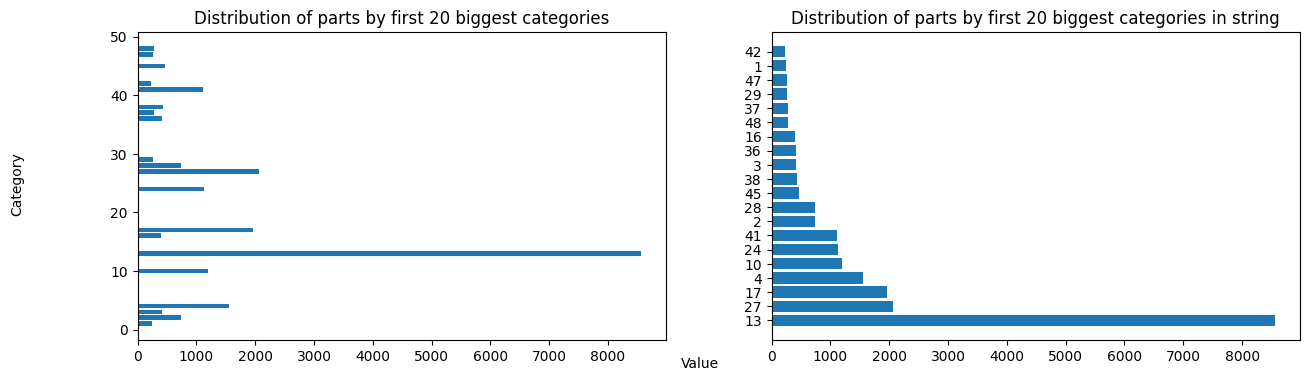

In [312]:
#Second Part

#Fixing error values in quantity coloumn of the inventory_parts
new_column = []
for q in inventory_parts["quantity"]:
    if q == -np.inf:
        new_column.append(0)
    else:
        new_column.append(int(q))
new_inventory_parts["quantity"] = pd.Series(new_column)

#Counting number of each part_category and sorting them
parts_count = {}
for i in range(len(new_parts["part_cat_id"])):
    if new_parts["part_cat_id"][i] in parts_count.keys():
        parts_count[new_parts["part_cat_id"][i]] += 1
    else:
        parts_count[new_parts["part_cat_id"][i]]  = 1
sortedCount = sorted(parts_count.items(), key=lambda x:x[1], reverse=True)

#Ploting
categories = []
categories_str = []
values = []
for i in range(20):
    categories.append(sortedCount[i][0])
    categories_str.append(str(sortedCount[i][0]))
    values.append(sortedCount[i][1])

fig, axs = plt.subplots(1, 2, figsize = (15, 4))

axs[0].barh(categories, values)
axs[0].set_title("Distribution of parts by first 20 biggest categories")

axs[1].barh(categories_str, values)
axs[1].set_title("Distribution of parts by first 20 biggest categories in string")

fig.text(0.5, 0.04, 'Value', ha='center')
fig.text(0.04, 0.5, 'Category', va='center', rotation='vertical')

plt.show()

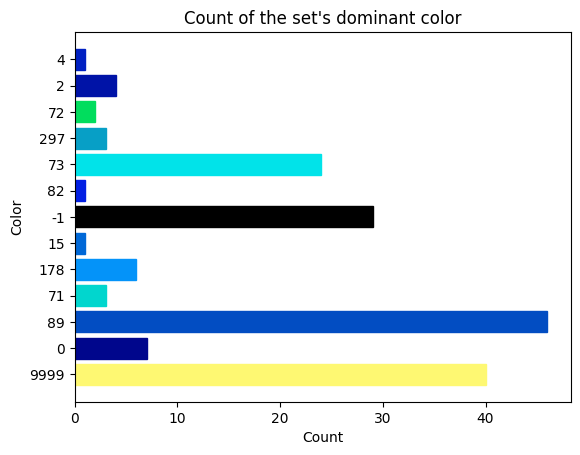

In [326]:
# Third Part
# Initialize a dictionary to store the color count for each LEGO set
color_count_set = {}

# Loop through each set in the dataset
for i in range(len(new_inventory_sets["set_id"])):
    id = new_inventory_sets["set_id"][i]
    
    # If the set is already in the dictionary, skip it
    if id in color_count_set.keys():
        continue
    
    # Initialize a dictionary to store the color count for this set
    color_count_set[id] = {}
    
    # Find the inventory for the current set
    for inv in new_inventory_sets.loc[(new_inventory_sets["set_id"] == id)]["inventory_id"]:
        
        # Loop through the parts in the inventory
        for j in range(len(new_inventory_parts.loc[(new_inventory_parts["inventory_id"] == inv)])):
            c_id = new_inventory_parts.loc[(new_inventory_parts["inventory_id"] == inv)]["color_id"].values[j]
            
            # If the color is not in the set's color count, initialize it
            if not (c_id in color_count_set[id].keys()):
                color_count_set[id][c_id] = 0
            
            # Increment the color count for this set
            color_count_set[id][c_id] += new_inventory_parts.loc[(new_inventory_parts["inventory_id"] == inv)]["quantity"].values[j]

# Initialize a dictionary to store the dominant color count
doms_count = {}
doms = []

# Loop through the sets and find the dominant color for each set
for set in color_count_set:
    if(len(color_count_set[set]) == 0):
        continue
    mx = 0
    
    # Find the color with the maximum count for the set
    for elem in color_count_set[set]:
        if color_count_set[set][elem] == color_count_set[set][max(color_count_set[set])]:
            mx = elem
    
    # If the dominant color count is 0, skip the set
    if(color_count_set[set][max(color_count_set[set])] == 0):
        continue
    
    # Add the dominant color to the list
    if not(mx in doms_count.keys()):
        doms_count[mx] = 0
    doms_count[mx] += 1

# Create lists to store colors and their counts
for col in doms_count.keys():
    doms.append(str(col))
cnt = []
for dom in doms:
    cnt.append(doms_count[int(dom)])

# Create a horizontal bar chart to visualize the dominant color counts
bars = plt.barh(doms, cnt)

# Set the colors of the bars based on the dominant color
for i in range(len(doms)):
    C = int((int(doms[i]) + 1) / 10001 * (256**3))
    bars[i].set_color((((C // 256) // 256) / 256, ((C // 256) % 256) / 256, (C % 256) / 256))
    
# Add labels and title to the chart and display it
plt.xlabel('Count')
plt.ylabel('Color')
plt.title("Count of the set's dominant color")
plt.show()

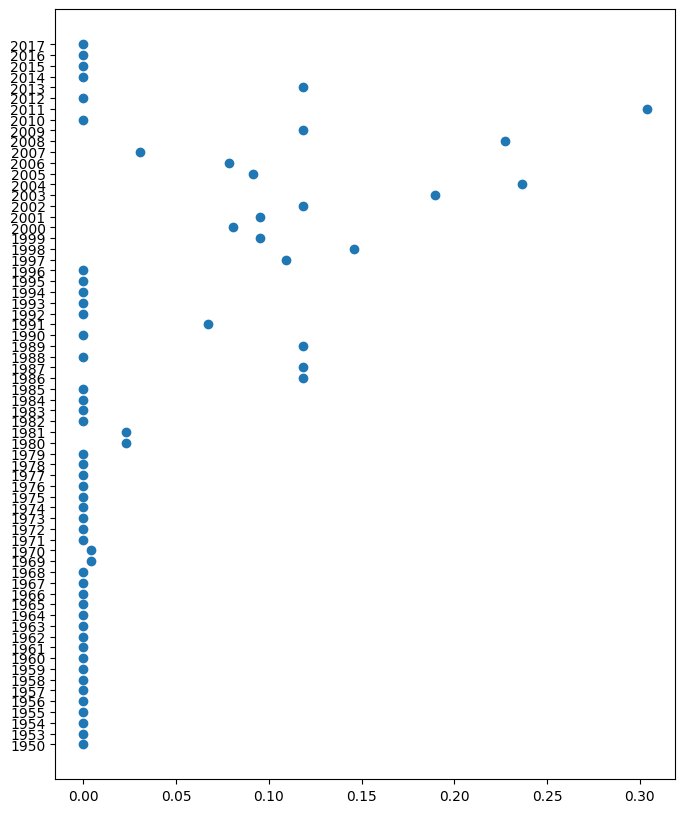

In [314]:
# Fourth Part
# Initialize empty lists to store years and luminance values
years = []
lum = []

# Sort the 'new_sets' DataFrame by the 'year' column in ascending order
new_sets.sort_values("year", inplace=True)

# Loop through unique years in the 'year' column
for yr in new_sets["year"].unique():
    sum = 0
    cnt = 0
    col = 0
    
    # Iterate through rows of 'new_sets' where 'year' matches the current year
    for index, row in new_sets.loc[(new_sets["year"] == yr)].iterrows():
        id = row["id"]
        
        # Check if the set ID is in 'color_count_set' dictionary
        if id in color_count_set.keys():
            if len(color_count_set[id]) > 0:
                # Calculate the weighted sum and count of colors for the set
                for c in color_count_set[id]:
                    sum += (c + 1) * color_count_set[id][c]
                    cnt += color_count_set[id][c]
    
    # Calculate the average color based on the weighted sum and count
    if cnt > 0:
        col = sum / cnt
    
    # Extract the RGB color components
    bc = (col % 256) / 256
    gc = ((col // 256) % 256) / 256
    rc = ((col // 256) // 256) / 256
    
    # Append the year to the 'years' list
    years.append(row["year"])
    
    # Calculate the luminance value for the color
    if cnt > 0:
        lum.append(np.sqrt(0.299 * rc * rc + 0.587 * gc * gc + 0.114 * bc * bc))
    else:
        lum.append(0)

# Create a scatter plot to visualize the relationship between luminance and years
plt.figure(figsize=(8, 10))
plt.scatter(lum, years)

# Display the plot
plt.show()

In [315]:
#From this scatter plot, it can be seen that the luinosity of the colors of the sets are getting higher,
#this can mean that the peoples interest in more brighter colors are increased over the recent years.

**Explain your approach and assumptions once this section is completed.**

## Loading Phase
1.1. **File Names and Data Loading**: Data is loaded from various CSV files within zip archives. The 'zipfile' module is used to extract and load data into separate DataFrames for further analysis.

## Cleaning Phase
1.2.1. **Cleaning Year Data**: The 'year' column in the 'new_sets' DataFrame is standardized. This involves removing unexpected characters and ensuring a consistent year format.

1.2.2. **Cleaning Inventory Parts Quantity**: The 'quantity' column in the 'new_inventory_parts' DataFrame is cleaned. Negative infinity values are replaced with 0, and all values are converted to integers.

1.2.3. **Counting Part Categories**: The code counts the number of parts in each category, sorts the results, and visually presents the distribution of parts by the top 20 categories using horizontal bar charts.

## Querying Phase
1.3.1. **Color Count for LEGO Sets**: A dictionary named 'color_count_set' is initialized to store color counts for each LEGO set. The code iterates through the 'new_inventory_sets' DataFrame to calculate color counts, taking into account the quantity of each color. Dominant colors for each set are determined, and a bar chart visualizes the count of each set's dominant color.

1.3.2. **Luminance vs. Year Scatter Plot**: The code computes the luminance of colors used in sets based on RGB color components and generates a scatter plot. This plot reveals the relationship between luminance and years, indicating potential trends in color luminance over time.

## 2. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this question you will again perform data wrangling and interpretation.

### 2.1. Loading phase
Load the json file into a `DataFrame`.


In [316]:
#Loading DataFrame
zf = zipfile.ZipFile('./data/bikes/metro-bike-share-trip-data.json.zip', 'r')
with zf.open('metro-bike-share-trip-data.json') as fh:
    trips = pd.read_json(fh)

### 2.2. Cleaning phase

Perform the following actions on the dataset.

1. Describe the type and the value range of each attribute.  

2. Indicate and transform the attributes that are `Categorical`.
3. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)?
4. What are the possible pitfalls of having such columns?

Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

In [317]:
#Describing datas:
trips.info()
trips.describe()
#Bike ID: A categroical attribute which indicates the Bike's ID's, can be transformed to non-categorical and can be described by int; [1349, 6728]
#Duration: A numerical attribute indicating duration which each bikes is being rode; [60, 86400]
#End Time: A semi-numerical attribute indicating the time that each bike is finidhed being riden, can be transformed to numerical
#Ending Station ID: A numerical attribute showing the ending station ID of each bike; [3000, 4108]
#Ending Station Latitude: A numerical value showing the latitude of each bikes ending station; [0, 34.01]
#Ending Station Longtitude: A numerical value showing the value of each bikes ending station longtitude; [-119, 0]
#Passholder Type: A non-numerical attribute indicating the type of the pass each bike has, cannot be transformed numerical
#Plan Duration: A numerical attribute showing how many days bikes plan took; [0, 365]
#Start Time: A semi-numerical attribute indicating the time that each bike started being riden, can be transformed to numerical
#Starting Station ID: A numerical attribute showing the starting station ID of each bike; [3000, 4108]
#Starting Station Latitude: A numerical value showing the latitude of each bikes starting station; [0, 34.01]
#Trip ID: A numerical attitude showing each trip's ID; [6369462, 23794220]
#Trip Route Category: A non-numerical attribute showing type of each trip, can be transformed to numerical but is non-necessary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132427 entries, 0 to 132426
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Bike ID                     132417 non-null  float64
 1   Duration                    132427 non-null  int64  
 2   End Time                    132427 non-null  object 
 3   Ending Station ID           132331 non-null  float64
 4   Ending Station Latitude     131376 non-null  float64
 5   Ending Station Longitude    131376 non-null  float64
 6   Passholder Type             132427 non-null  object 
 7   Plan Duration               131661 non-null  float64
 8   Start Time                  132427 non-null  object 
 9   Starting Station ID         132408 non-null  float64
 10  Starting Station Latitude   132379 non-null  float64
 11  Starting Station Longitude  132379 non-null  float64
 12  Trip ID                     132427 non-null  int64  
 13  Trip Route Cat

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
count,132417.000000,132427.000000,132331.00000,131376.000000,131376.000000,131661.000000,132408.000000,132379.000000,132379.000000,1.324270e+05
mean,6193.618878,1555.301562,3042.38672,34.034614,-118.206642,44.821967,3043.020754,34.039309,-118.221534,1.153001e+07
std,293.606755,5814.241813,43.08440,0.650706,2.259913,90.411579,37.742021,0.529336,1.838335,6.369462e+06
min,1349.000000,60.000000,3000.00000,0.000000,-118.472832,0.000000,3000.000000,0.000000,-118.472832,1.912818e+06
25%,5953.000000,360.000000,3022.00000,34.044159,-118.256981,0.000000,3024.000000,34.044170,-118.256980,5.060814e+06
50%,6186.000000,600.000000,3038.00000,34.046810,-118.250954,30.000000,3040.000000,34.046822,-118.250954,1.043827e+07
75%,6434.000000,1080.000000,3063.00000,34.050480,-118.238810,30.000000,3063.000000,34.050880,-118.241562,1.720633e+07
max,6728.000000,86400.000000,4108.00000,34.064281,0.000000,365.000000,4108.000000,34.064281,0.000000,2.379422e+07


In [319]:
#Cleaning Data:
#Change non-necessary float values to int, changing dates string format to Datetime type and erasing coloumns with nan values
# Creating copiy of the original DataFrame
new_trips = trips.copy()
new_trips.dropna(inplace=True)
# Convert numeric float columns to integers
for col in ['Bike ID', 'Ending Station ID', 'Starting Station ID']:
    new_trips[col] = new_trips[col].astype(int)

# Convert string datetime columns to datetime format
for col in ['End Time', 'Start Time']:
    new_trips[col] = pd.to_datetime(new_trips[col], format='%Y-%m-%dT%H:%M:%S')

# Convert categorical columns to categorical
for col in ['Passholder Type', 'Trip Route Category']:
    new_trips[col] = pd.Categorical(new_trips[col])

In [ ]:
#Yes, there are redundant columns in this dataset, for example Duration is not needed when we have Starting and Ending Time
#Data redundancy have numerous problems; One of them is the problem with storing too much data and processing them which are unnecessary and can be gaind from other datas,
#other thing is redundant data can cause in overfitting problems which should be avoided, other than that, data redundancy can decrease the accuracy of data because of
#the increasing chance of miss-value data in higher amounts of data

In [324]:
#Droping redundant coloumns
trips_unredundant = new_trips.drop(["Duration"], axis=1)
trips_unredundant.head(10)

,Bike ID,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281,2016-07-07 04:20:00,3014,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07 04:17:00,3014,34.056610,-118.23721,1912818,Round Trip
1,6281,2016-07-07 06:33:00,3014,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07 06:00:00,3014,34.056610,-118.23721,1919661,Round Trip
2,5861,2016-07-07 10:37:00,3016,34.052898,-118.24156,Flex Pass,365.0,2016-07-07 10:32:00,3016,34.052898,-118.24156,1933383,Round Trip
3,5861,2016-07-07 13:38:00,3016,34.052898,-118.24156,Flex Pass,365.0,2016-07-07 10:37:00,3016,34.052898,-118.24156,1944197,Round Trip
4,6674,2016-07-07 12:58:00,3032,34.049889,-118.25588,Walk-up,0.0,2016-07-07 12:51:00,3032,34.049889,-118.25588,1940317,Round Trip
5,6717,2016-07-07 13:04:00,3054,34.039219,-118.23649,Monthly Pass,30.0,2016-07-07 12:51:00,3021,34.045609,-118.23703,1944075,One Way
6,5721,2016-07-07 13:04:00,3014,34.056610,-118.23721,Monthly Pass,30.0,2016-07-07 12:54:00,3022,34.046070,-118.23309,1944073,One Way
7,5957,2016-07-07 13:09:00,3005,34.048550,-118.25905,Flex Pass,365.0,2016-07-07 12:59:00,3076,34.040600,-118.25384,1944067,One Way
8,6137,2016-07-07 13:49:00,3031,34.044701,-118.25244,Flex Pass,365.0,2016-07-07 13:01:00,3031,34.044701,-118.25244,1944062,Round Trip
9,6351,2016-07-07 13:17:00,3078,34.064281,-118.23894,Monthly Pass,30.0,2016-07-07 13:01:00,3031,34.044701,-118.25244,1944063,One Way


**Explain your approach and assumptions once this section is completed.**

### 2.3. Querying phase
Answer the following queries using the functionality of `Pandas`.

* Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations).  

* Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.
* For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.
* Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.
* Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.

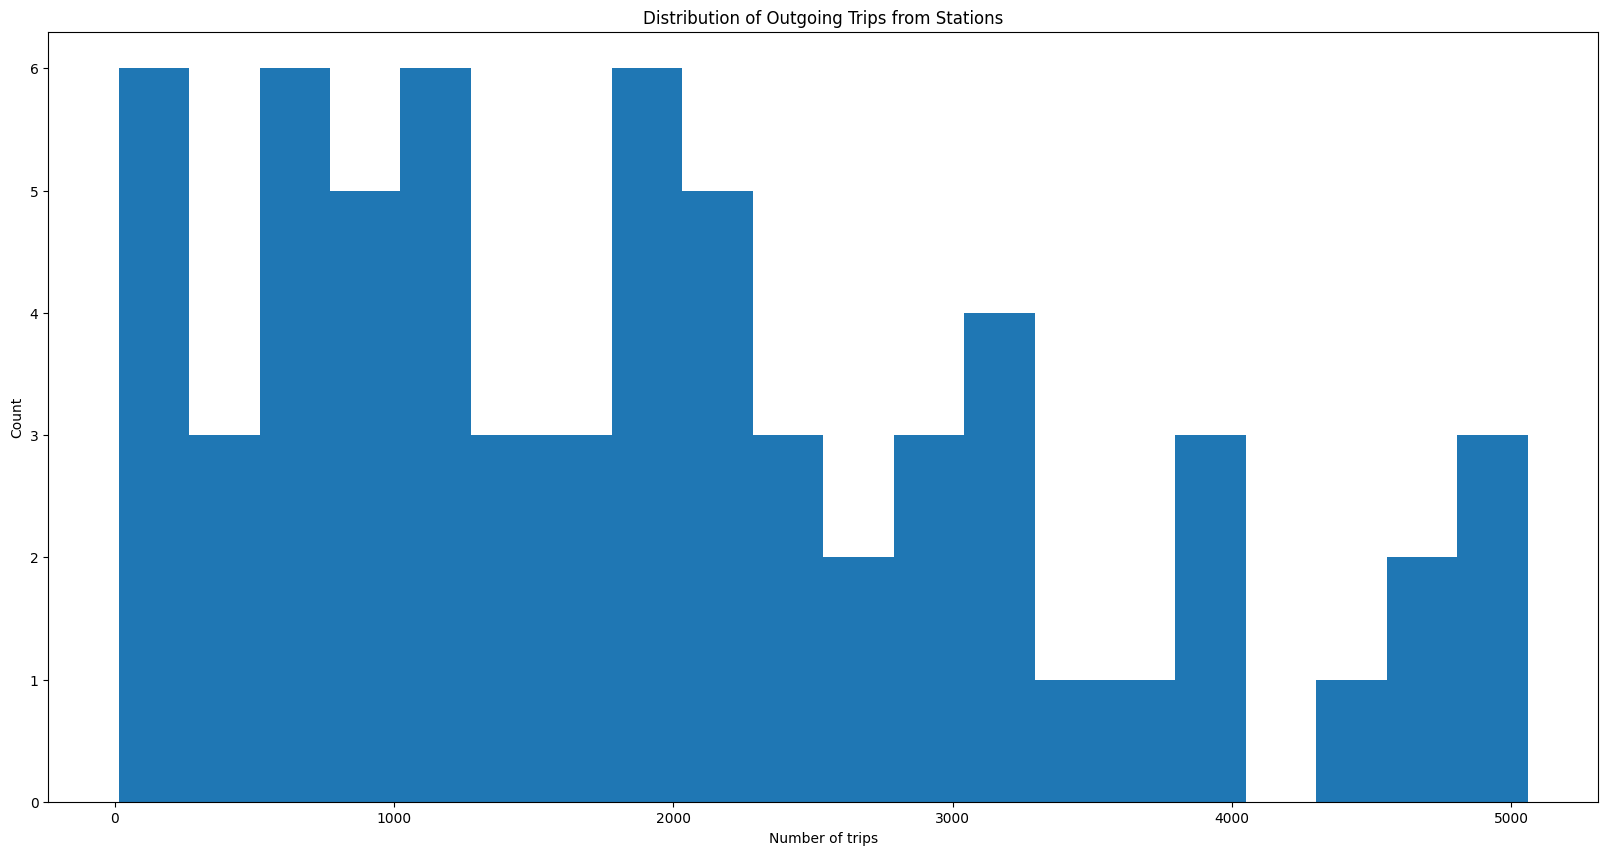

In [334]:
#First Part
# Grouping bike trips by 'Starting Station ID' and counting the number of trips for each station
outgoing_trips = new_trips.groupby('Starting Station ID').size().reset_index(name='count')

# Create a figure and axis for the histogram plot
fig, ax = plt.subplots(figsize=(20, 10))

# Plot a histogram of the number of outgoing trips with 20 bins
ax.hist(outgoing_trips['count'], bins=20)

# Set the x-axis label
ax.set_xlabel("Number of trips")

# Set the y-axis label
ax.set_ylabel("Count")

# Set the title of the plot
ax.set_title("Distribution of Outgoing Trips from Stations")

# Display the plot
plt.show();

C:\Users\Hadi\AppData\Local\Temp\ipykernel_16920\455891106.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["0", "50K", "100K", "150K", "200K", "300K"])


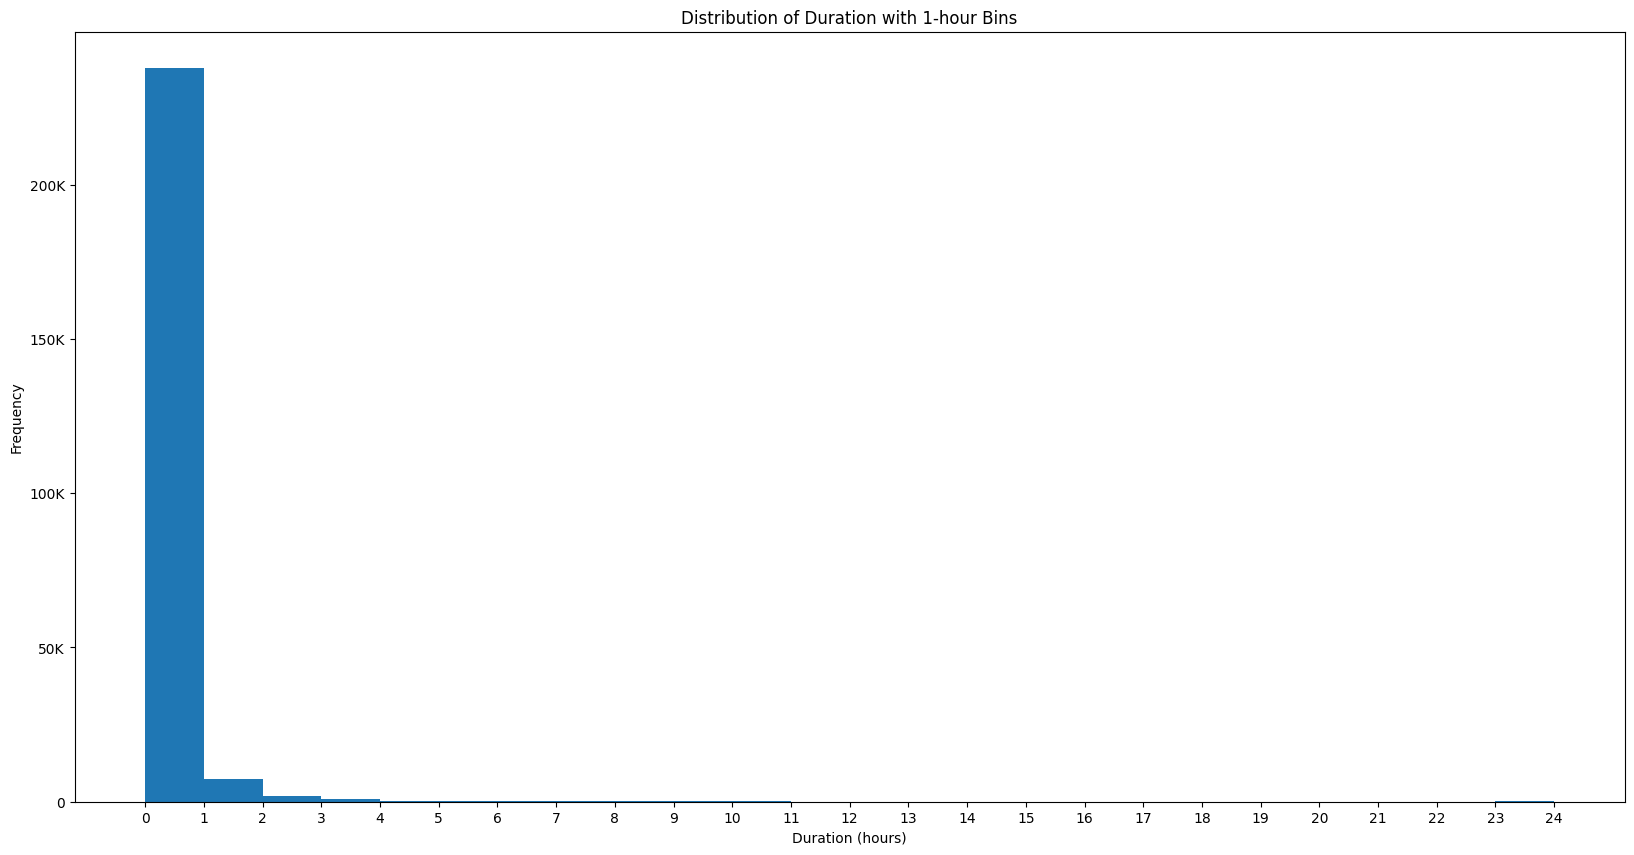

In [364]:
#Second Part
# Calculate the duration in hours by dividing by 3600 seconds
duration_hours = new_trips['Duration'] / 3600

# Create a figure and axis for the histogram plot
fig, ax = plt.subplots(figsize=(20, 10))

# Create a histogram plot using Matplotlib with 1-hour bins
ax.hist(duration_hours, bins=range(0, 25), density=True)

# Set the x-axis label
ax.set_xlabel("Duration by hours")

# Set the y-axis label
ax.set_ylabel("Counts")

# Set the title of the plot
ax.set_title("Distribution of Duration with 1-hour Bins")

# Set the x-axis ticks to show hours from 0 to 24
ax.set_xticks(range(0, 25))

# Set abels for the y-axis which shows the count instead of density
ax.set_yticklabels(["0", "50K", "100K", "150K", "200K", "300K"])

# Display the plot
plt.show()

**Explain your approach and assumptions once this section is completed.**

## Phase 1.1: Loading Phase
In the Loading Phase, the code loads a dataset of bike trips from a ZIP file. It uses the `zipfile` module to open the ZIP file and read the JSON data using `pd.read_json`. It provides a brief description of the dataset, including data types and summary statistics for each attribute. The attributes in the dataset, such as 'Bike ID', 'Duration', 'End Time', and more, are briefly explained.

## Phase 1.2: Cleaning Phase
In the Cleaning Phase, the code cleans the loaded dataset by making various transformations. It creates a copy of the original DataFrame named `new_trips`, drops rows with missing values, converts specific numeric float columns to integers, and transforms string date-time columns to datetime format. It also converts categorical columns to categorical data types, making the dataset more suitable for analysis. It briefly mentions the importance of avoiding data redundancy and demonstrates the removal of redundant columns, such as 'Duration', which can be inferred from other data.

## Phase 1.3: Querying Phase - First Part
In the first part of the Querying Phase, the code groups bike trips by the 'Starting Station ID' and counts the number of trips for each station. It then creates a histogram to visualize the distribution of outgoing trips from stations.

## Phase 1.3: Querying Phase - Second Part
In the second part of the Querying Phase, the code calculates the duration of bike trips in hours and creates a histogram with 1-hour bins. The x-axis represents the duration in hours, and the y-axis represents the counts. The title and labels for the axes are set, and the x-axis ticks are defined to show hours from 0 to 24. Additionally, the code changes the y-axis labels to '0', '50K', '100K', '150K', '200K', and '300K' so that the bars are according to the numbers. The resulting plot displays the distribution of trip durations.

## 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

**Run the following cell for a brief description about the dataset**

In [ ]:
from IPython.core.display import HTML
DATA_FOLDER = './data'
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`.  
 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

In [ ]:
#First Part

#Reading the dataset
titanic = pd.read_excel('./data/titanic.xls')

#Describing datas:
titanic.info()
titanic.describe()

#pclass: A numerical data which indicates which class of ticket each passenger owns; [1, 2, 3]
#survived: A numerical boolean data which indicates wheter a passenger survived or not; [0, 1]
#name: A categorical data which cannot be transformed to numerical(transforming it is nonsense)
#sex: A categorical data which can be transformed to numerical(by considering 0 for female and 1 for male, for examlpe); [male, female]
#age: A numerical data indicating age of the each of passengers; [0, 81)
#sibsp: A numerical data indicating number of siblings or spouses of a passenger onboard; [0, 8]
#parch: A numerical data indicating the number of parents or children of a passenger onboard; [0, 9]
#ticket: A numerical data indicating each passenger's ticket number
#fare: A numerical data indicating the fare each passenger paid; [0, 512.392]
#cabin: A categorical data which can be transformed to numerical(for example by using a number instead of each of the english letters with the same order); [Ax, Gx] with one outlier T
#embarked: A categorical data indicating the port each passenger embarked, cannot be transformed to numerical data; [S, C, Q]
#boat: A numerical data indicating the boat number each passenger used
#body: A numerical data related to the dead passengers, which indicates the number given to their body; [0, 328]
#home.dest: A categorical data indicating each passengers home and destination, and also cannot be tranformed to numerical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


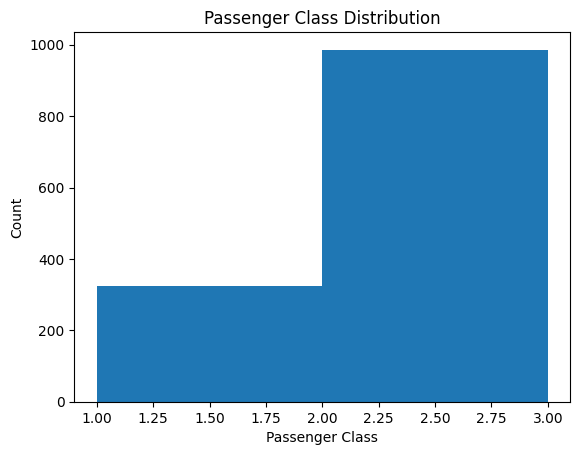

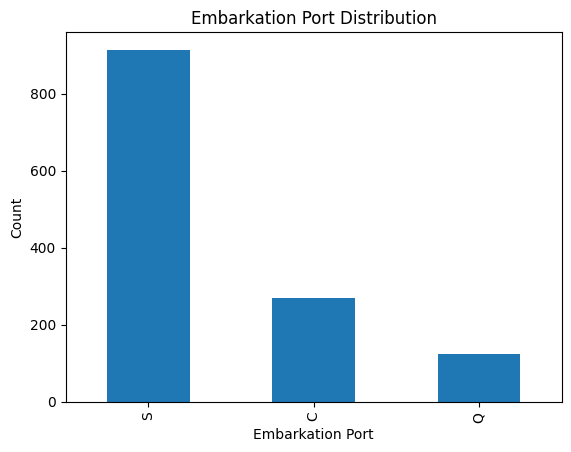

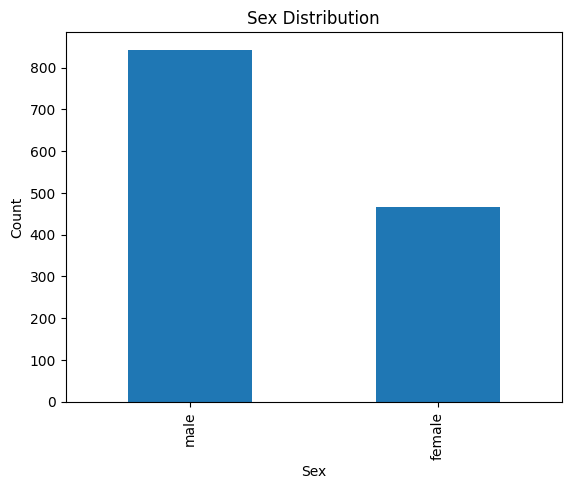

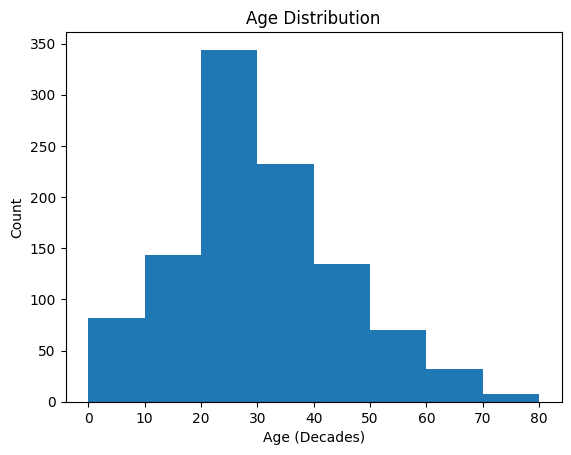

In [ ]:
#Second Part

#Travel Class
titanic['pclass'].plot.hist(bins = [1, 2, 3],)
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

#Embarkation Port
titanic['embarked'].value_counts().plot(kind='bar')
plt.title('Embarkation Port Distribution')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.show()

#Sex
titanic['sex'].value_counts().plot(kind='bar')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

#Age
titanic['age'].plot.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
plt.title('Age Distribution')
plt.xlabel('Age (Decades)')
plt.ylabel('Count')
plt.show()

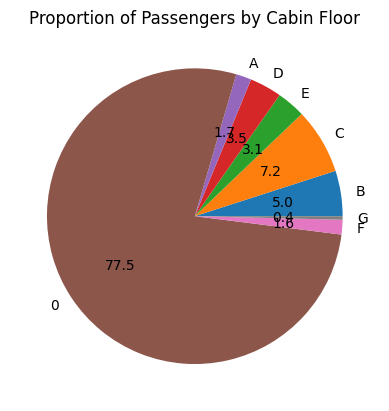

In [ ]:
#Third Part

#Extracting cabin floors from the data set
cabs = []
for c in titanic['cabin']:
    if isinstance(c, str):
        if c == "T":
            cabs.append("0")
            continue
        cabs.append(c[0])
    elif math.isnan(c):
        #O is related to the passengers with no data of their cabins
        cabs.append("0")
        continue

#Number of Unique Cabins
cabins_count = len(pd.Series(cabs).unique())

#Calculating the proportion related to each floor
names = []
proportions = []
for cab in pd.Series(cabs).unique():
    names.append(cab)
    proportions.append(cabs.count(cab) / len(titanic["cabin"]))

#Plotting
plt.pie(proportions, labels=names, autopct='%.1f')
plt.title('Proportion of Passengers by Cabin Floor')
plt.show()

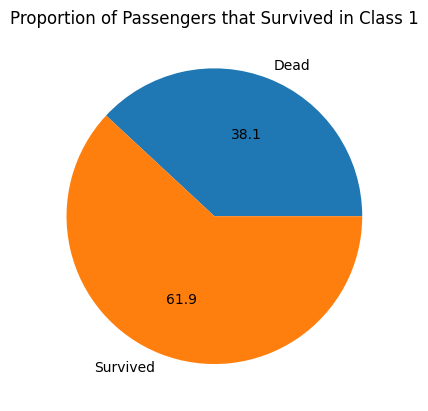

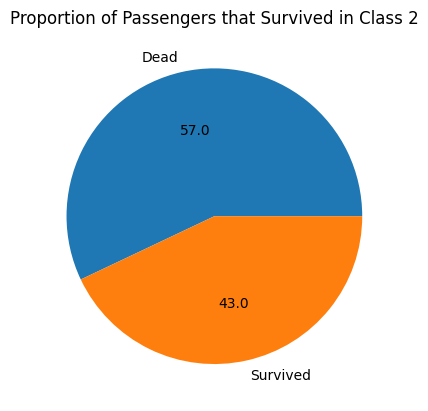

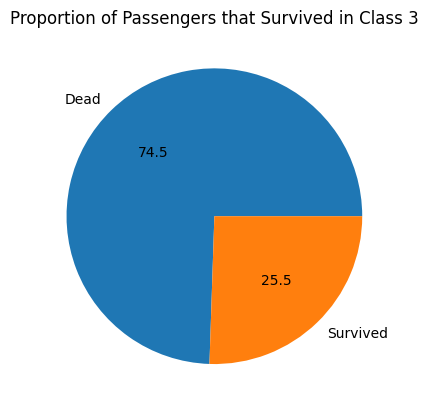

In [ ]:
#Fourth Part
#Making a new dataframe according to passengers class and the rate of their survival
class_survival_counts = titanic.groupby('pclass')['survived'].value_counts(normalize=True).unstack().fillna(0)

#Plotting according to proportion survived passengers in each class
t = 1
for p_class, proportions in class_survival_counts.iterrows():
    plt.pie(proportions, labels=['Dead', 'Survived'], autopct='%.1f')
    plt.title("Proportion of Passengers that Survived in Class " + str(t))
    plt.show()
    t += 1

survived         0    1
pclass sex             
1      female    5  139
       male    118   61
2      female   12   94
       male    146   25
3      female  110  106
       male    418   75


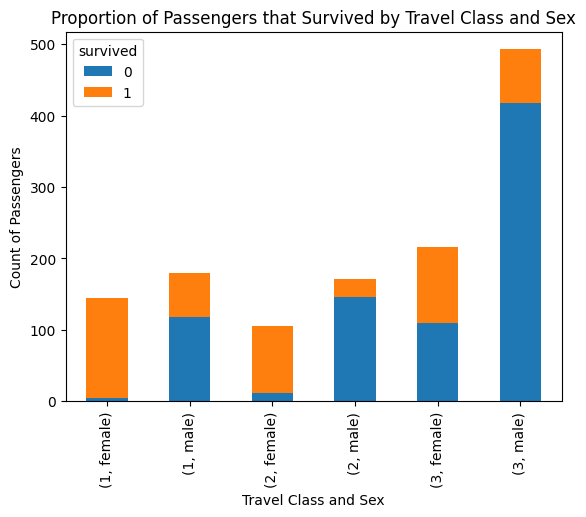

In [ ]:
#Fifth Part
#Creating a new and reshaping the dataframe into a desired form
proportions = titanic.groupby(['pclass', 'sex', 'survived'])['survived'].count().unstack(level=2)

#Ploting by proportion of passengers br travel class and sex
proportions.plot(kind='bar', stacked=True)
plt.title('Proportion of passengers that survived by travel class and sex')
plt.xlabel('Travel class and Sex')
plt.ylabel('Count of Passengers')

plt.show()

In [ ]:
#Sixth Part

# Sort the DataFrame by age
titanic_sorted = titanic.sort_values('age')

# Divide the DataFrame into two equal age categories using pd.qcut
titanic_sorted['age_category'] = pd.qcut(titanic_sorted['age'], 2)

# Calculate survival proportions for each combination of age category, travel class, and sex
result = titanic_sorted.groupby(['age_category', 'pclass', 'sex'])['survived'].mean().reset_index()
result = result.rename(columns={'survived': 'Survival Proportion'})

# Display the result DataFrame
print(result)


     age_category  pclass     sex  Survival Proportion
0   (0.166, 28.0]       1  female             0.951220
1   (0.166, 28.0]       1    male             0.531250
2   (0.166, 28.0]       2  female             0.910714
3   (0.166, 28.0]       2    male             0.216216
4   (0.166, 28.0]       3  female             0.513761
5   (0.166, 28.0]       3    male             0.183036
6    (28.0, 80.0]       1  female             0.967391
7    (28.0, 80.0]       1    male             0.302521
8    (28.0, 80.0]       2  female             0.872340
9    (28.0, 80.0]       2    male             0.083333
10   (28.0, 80.0]       3  female             0.372093
11   (28.0, 80.0]       3    male             0.144000


C:\Users\Hadi\AppData\Local\Temp\ipykernel_16920\864781646.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = titanic_sorted.groupby(['age_category', 'pclass', 'sex'])['survived'].mean().reset_index()


**Explain your approach and assumptions once this section is completed.**

### First Part
I began by reading the Titanic dataset, inspecting its structure, and obtaining summary statistics. To gain an overview of the data, I used the `pd.read_excel()`, `titanic.info()`, and `titanic.describe()` functions.

### Second Part
I created visualizations to illustrate the distribution of passenger class, embarkation port, sex, and age in the dataset. To visualize data, I used histograms, bar charts, and the `plot` function from the Pandas and Matplotlib libraries.

### Third Part
I extracted cabin floors from the 'cabin' column, calculated unique cabin floors, and visualized the proportions using a pie chart. This involved iterating through the 'cabin' column and utilizing techniques like list comprehension, handling missing values, and calculating proportions.

### Fourth Part
I generated a DataFrame showing the proportion of passengers who survived or died in each passenger class and represented it with pie charts. For this, I used the `groupby` and `unstack` functions to aggregate the data and visualize it using pie charts.

### Fifth Part
I created a DataFrame displaying the survival proportions by travel class and sex and presented the data with a stacked bar chart. This part involved grouping and stacking data to provide insights into survival proportions based on multiple factors.

### Sixth Part
I sorted the dataset by age, categorized passengers into two age groups, calculated survival proportions based on age, travel class, and sex, and printed the results. The key techniques included sorting data, creating new categories using `pd.qcut`, and aggregating survival proportions for analysis.

## Bonus. Covid in the US
In this question, you are required to reproduce the graphs shown in a real journalistic article. After all, reproducibility is an important part of professional journalism as well as data science. Also, a great deal of a data scientist's work is to communicate data in a way that anyone with any level of expertise in the field would understand.

You should reproduce the 4 graphs shown in <a href="https://projects.fivethirtyeight.com/coronavirus-polls/"> this article</a>. The data is openly accessible through <a href="https://github.com/fivethirtyeight/covid-19-polls/"> FiveThirtyEight's github</a>. Nevertheless, both the data and the article are available in `data` folder in case of unstable internet connections!

*Note: Your graphs don't have to be as interactive or detailed as the ones on the website. Only showing the averages, some (not all) data points with light color, legends, titles, x values, and y values are necessary.*

**Explain your approach and assumptions once this section is completed.**